In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h2o

In [2]:
h2o.init(nthreads=-1,max_mem_size=8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from C:\Users\jjk84\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\jjk84\AppData\Local\Temp\tmpc98yj6w2
  JVM stdout: C:\Users\jjk84\AppData\Local\Temp\tmpc98yj6w2\h2o_jjk84_started_from_python.out
  JVM stderr: C:\Users\jjk84\AppData\Local\Temp\tmpc98yj6w2\h2o_jjk84_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,06 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,3 months and 18 days !!!
H2O cluster name:,H2O_from_python_jjk84_18mbra
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [3]:
train = pd.read_csv('C:/Users\jjk84/Downloads/train_2016_v2.csv')
prop = pd.read_csv('C:/Users\jjk84/Downloads/properties_2016.csv')
sample = pd.read_csv('C:/Users\jjk84/Downloads/sample_submission.csv')

C:\Users\jjk84\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
train_df = pd.merge(train, prop, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [7]:
pd.options.display.max_rows = 65

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,object
3,airconditioningtypeid,float64
4,architecturalstyletypeid,float64
5,basementsqft,float64
6,bathroomcnt,float64
7,bedroomcnt,float64
8,buildingclasstypeid,float64
9,buildingqualitytypeid,float64


In [8]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

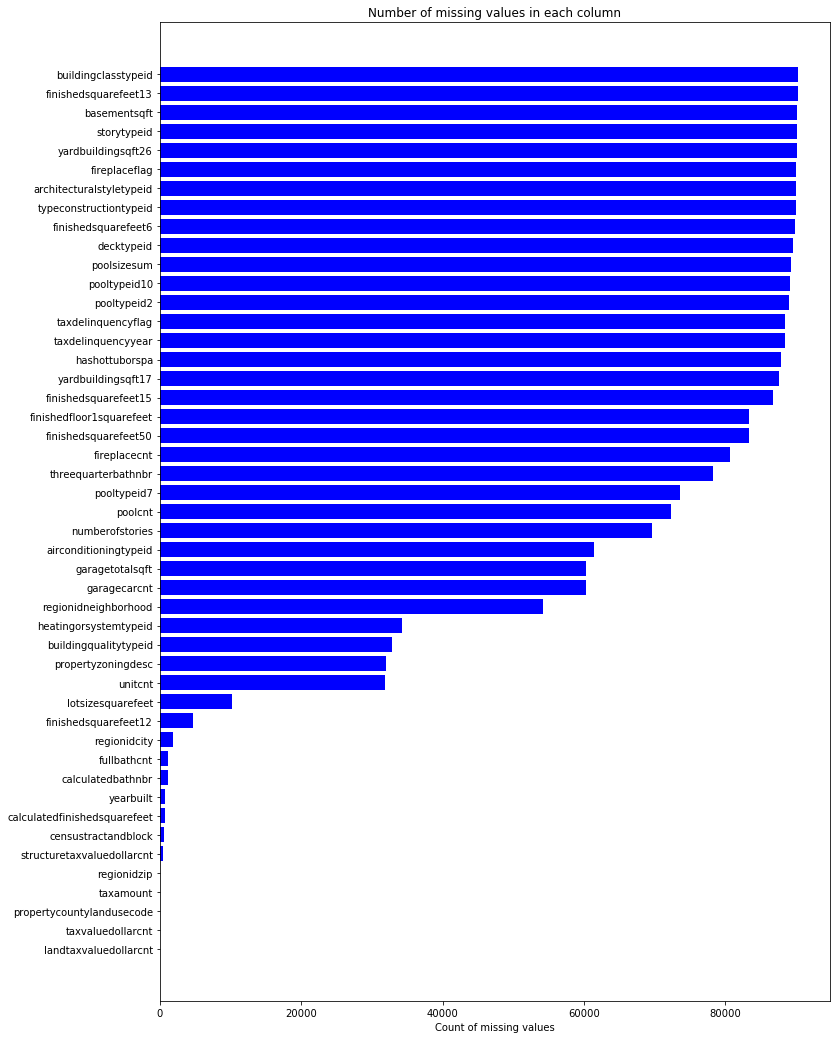

In [9]:
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [10]:
train_df = train_df.drop(['parcelid', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode','fips','latitude','longitude'], axis=1)

In [11]:
for c in train_df.dtypes[train_df.dtypes == object].index.values:
    train_df[c] = (train_df[c] == True)

In [13]:
df=h2o.H2OFrame(python_obj=train_df.to_dict("list"))

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [18]:
splits = df.split_frame(ratios=[0.7, 0.15])

In [19]:
train = splits[0]
valid = splits[1]
test = splits[2]

In [35]:
y_names = df.col_names[0]
x_names = df.col_names[1:53]

In [57]:
col_list = df.col_names
x_names=[]
for index,value in enumerate(df.columns)
    if index in []range()+range()
        x_names.append(value)      

TypeError: 'str' object is not callable

In [ ]:
from h2o.estimators.pca import H2OPrincipalComponentAnalysisEstimator
pca_decomp = H2OPrincipalComponentAnalysisEstimator(k=4, transform="NONE", pca_method="Power")
pca_decomp.train(x=x_pca, training_frame=df)